### Tests de entrenamiento para el conjunto de datos IRIS 

Importamos todas las librerias y modulos necesarios

In [44]:
from Neural_Network.layer import Layer
from data.load_data import load_iris_data
from Neural_Network.neural_network import NeuralNetwork
from sklearn.model_selection import train_test_split
from Neural_Network.preprocessing import preprocess_datairis
from Neural_Network.activations import softmax, softmax_derivate, relu, relu_derivate
from Neural_Network import optimizers
import numpy as np
from Neural_Network.visualizations import plot_confusion_matrix

Cargamos los datos de iris y preprocesamos los datos

In [45]:
X, y = load_iris_data() 
X, y = preprocess_datairis(X, y.reshape(-1, 1))

Dividimos los datos en conjuntos de entrenamiento y prueba

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Inicializamos la red neuronal y agregamos capas a esta

In [47]:
nn = NeuralNetwork()
nn.add_layer(Layer(4, 5, activation_func=relu, activation_derivate=relu_derivate))
nn.add_layer(Layer(5, 3, activation_func=softmax, activation_derivate=softmax_derivate))

Evaluamos la precisión antes y después de entrenar la red neuronal

In [48]:
accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy before training: ", accuracy)
(acc1, loss1) = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)
new_accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy after training: ", new_accuracy)

accuracy before training:  0.5
epoch   0 - Loss 1.00312, Accuracy 0.79167
epoch  10 - Loss 0.10437, Accuracy 0.83333
epoch  20 - Loss 0.02422, Accuracy 0.83333
epoch  30 - Loss 0.00809, Accuracy 0.83333
epoch  40 - Loss 0.00404, Accuracy 0.87500
epoch  50 - Loss 0.00245, Accuracy 0.91667
epoch  60 - Loss 0.00108, Accuracy 0.87500
epoch  70 - Loss 0.00062, Accuracy 0.91667
epoch  80 - Loss 0.00042, Accuracy 0.91667
epoch  90 - Loss 0.00031, Accuracy 0.91667
epoch 100 - Loss 0.00025, Accuracy 0.91667
epoch 110 - Loss 0.00020, Accuracy 0.87500
epoch 120 - Loss 0.00016, Accuracy 0.87500
epoch 130 - Loss 0.00014, Accuracy 0.87500
epoch 140 - Loss 0.00011, Accuracy 0.87500
epoch 150 - Loss 0.00010, Accuracy 0.87500
epoch 160 - Loss 0.00008, Accuracy 0.87500
epoch 170 - Loss 0.00007, Accuracy 0.87500
epoch 180 - Loss 0.00006, Accuracy 0.87500
epoch 190 - Loss 0.00005, Accuracy 0.87500
epoch 200 - Loss 0.00004, Accuracy 0.87500
epoch 210 - Loss 0.00004, Accuracy 0.87500
epoch 220 - Loss 0.0000

Hacemos la matriz de confusión

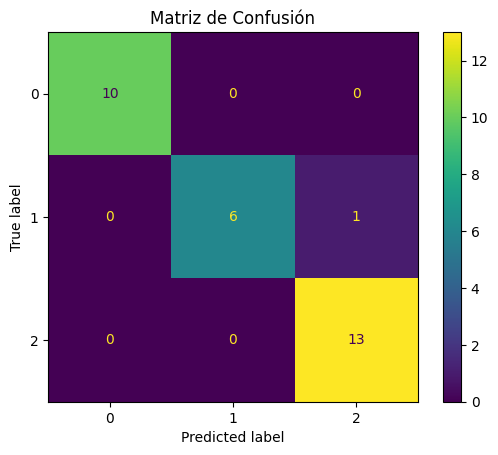

In [49]:
y_pred = [nn.feedforward(x) for x in X_test]
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_test, y_pred)

Ahora realizaremos la misma prueba pero añadiendo más capas

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
nn = NeuralNetwork()
nn.add_layer(Layer(4, 10, activation_func=relu, activation_derivate=relu_derivate))
nn.add_layer(Layer(10, 5, activation_func=relu, activation_derivate=relu_derivate))
nn.add_layer(Layer(5, 3, activation_func=softmax, activation_derivate=softmax_derivate))

In [52]:
accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy before training: ", accuracy)
(acc1, loss1) = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)
new_accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy after training: ", new_accuracy)

accuracy before training:  0.06666666666666667
epoch   0 - Loss 0.51063, Accuracy 0.54167
epoch  10 - Loss 0.12189, Accuracy 0.91667
epoch  20 - Loss 0.07027, Accuracy 0.95833
epoch  30 - Loss 0.03667, Accuracy 0.95833
epoch  40 - Loss 0.01730, Accuracy 0.95833
epoch  50 - Loss 0.01031, Accuracy 0.95833
epoch  60 - Loss 0.00651, Accuracy 0.95833
epoch  70 - Loss 0.00387, Accuracy 0.95833
epoch  80 - Loss 0.00237, Accuracy 0.95833
epoch  90 - Loss 0.00157, Accuracy 0.95833
epoch 100 - Loss 0.00120, Accuracy 0.95833
epoch 110 - Loss 0.00104, Accuracy 0.95833
epoch 120 - Loss 0.00099, Accuracy 0.95833
epoch 130 - Loss 0.00089, Accuracy 0.95833
epoch 140 - Loss 0.00079, Accuracy 0.95833
epoch 150 - Loss 0.00070, Accuracy 0.95833
epoch 160 - Loss 0.00061, Accuracy 0.95833
epoch 170 - Loss 0.00053, Accuracy 0.95833
epoch 180 - Loss 0.00047, Accuracy 0.95833
epoch 190 - Loss 0.00042, Accuracy 0.95833
epoch 200 - Loss 0.00038, Accuracy 0.95833
epoch 210 - Loss 0.00034, Accuracy 0.95833
epoch 2

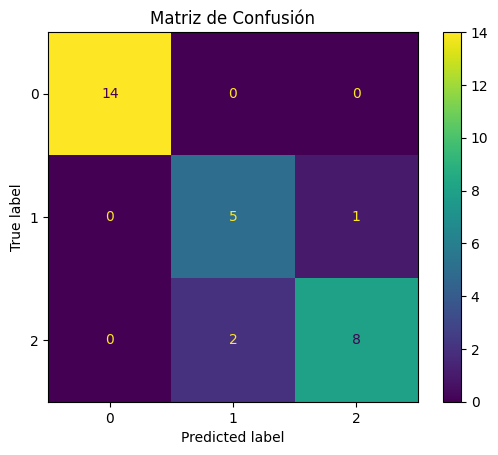

In [53]:
y_pred = [nn.feedforward(x) for x in X_test]
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_test, y_pred)

Como podemos ver en los resultados, nos damos cuenta que el accuracy bajó en relación con el anterior modelo:

$$ \text{Accuracy}_{1ermodelo}=0.96$$

$$ \text{Accuracy}_{2domodelo}=0.90$$


Por lo que podemos llegar a la conclusión de que la neurona funciona mejor usando 1 capa oculta que con 2.